✅ Digital Twin model was successfully trained.

✅ Digital Twin Online Model Loaded.
-------------------------------------------------

📡 Connecting to NIS Building

🔴 START LIVE DATA STREAM

--- Month 25-Dec ---
🌡️  Conditions: Outside 32.68°C | Inside 22.0°C
⚡  Energy: Actual 9,867 vs Predicted 7,672 kWh
⚠️  ALERT: High Consumption! (+28.6%) Check HVAC systems.



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


--- Month Apr-25 ---
🌡️  Conditions: Outside 28.69°C | Inside 21.66°C
⚡  Energy: Actual 9,239 vs Predicted 8,820 kWh
🆗  NORMAL: System performing as expected. (4.8%) 



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


--- Month Aug-25 ---
🌡️  Conditions: Outside 29.18°C | Inside 21.26°C
⚡  Energy: Actual 8,601 vs Predicted 7,912 kWh
⚠️  ALERT: High Consumption! (+8.7%) Check HVAC systems.



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


--- Month Feb-25 ---
🌡️  Conditions: Outside 32.35°C | Inside 19.83°C
⚡  Energy: Actual 10,087 vs Predicted 8,854 kWh
⚠️  ALERT: High Consumption! (+13.9%) Check HVAC systems.



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


--- Month Jan-25 ---
🌡️  Conditions: Outside 30.71°C | Inside 20.65°C
⚡  Energy: Actual 10,377 vs Predicted 8,032 kWh
⚠️  ALERT: High Consumption! (+29.2%) Check HVAC systems.



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


--- Month Jul-25 ---
🌡️  Conditions: Outside 29.64°C | Inside 21.18°C
⚡  Energy: Actual 8,550 vs Predicted 7,957 kWh
⚠️  ALERT: High Consumption! (+7.5%) Check HVAC systems.



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


--- Month Jun-25 ---
🌡️  Conditions: Outside 29.58°C | Inside 19.71°C
⚡  Energy: Actual 7,178 vs Predicted 7,965 kWh
✅  GOOD: Efficiency Savings! (-9.9%) 



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


--- Month Mar-25 ---
🌡️  Conditions: Outside 33.58°C | Inside 19.21°C
⚡  Energy: Actual 10,069 vs Predicted 8,858 kWh
⚠️  ALERT: High Consumption! (+13.7%) Check HVAC systems.



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


--- Month May-25 ---
🌡️  Conditions: Outside 29.76°C | Inside 22.62°C
⚡  Energy: Actual 10,884 vs Predicted 8,578 kWh
⚠️  ALERT: High Consumption! (+26.9%) Check HVAC systems.



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


--- Month Nov-25 ---
🌡️  Conditions: Outside 31.05°C | Inside 23.48°C
⚡  Energy: Actual 9,241 vs Predicted 8,428 kWh
⚠️  ALERT: High Consumption! (+9.6%) Check HVAC systems.



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


--- Month Oct-25 ---
🌡️  Conditions: Outside 31.34°C | Inside 20.62°C
⚡  Energy: Actual 7,429 vs Predicted 8,109 kWh
✅  GOOD: Efficiency Savings! (-8.4%) 



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


--- Month Sep-25 ---
🌡️  Conditions: Outside 29.59°C | Inside 21.21°C
⚡  Energy: Actual 6,823 vs Predicted 7,972 kWh
✅  GOOD: Efficiency Savings! (-14.4%) 

🛑 End LIVE DATA STREAM

Opening Dashboard for NIS BUILDING



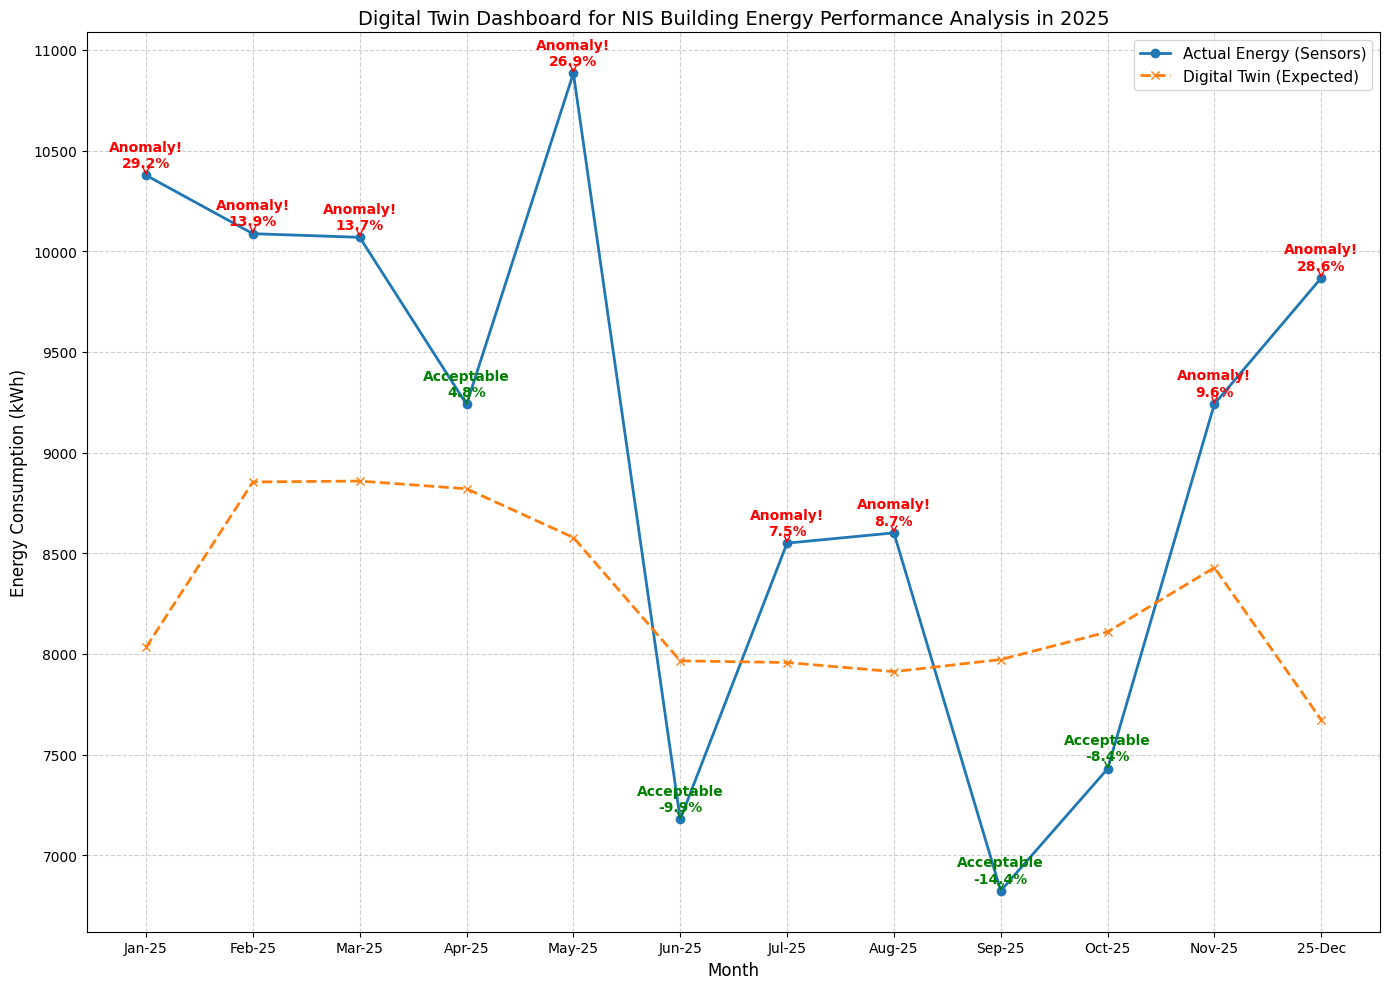

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import time

# ---------------------------------------------------------
# STEP 1: LOAD AND PREPARE DATA
# ---------------------------------------------------------
# Load the dataset
try:
    df = pd.read_csv('NIS_building_energy.csv')
except FileNotFoundError:
    print("Error: Please make sure 'Building_LST_energy_monthly.csv' is in the same folder as this script.")
    exit()

# Feature Engineering: The 'Driver' is the temp difference
df['Delta_T'] = df['LST'] - df['I_temp']

# ---------------------------------------------------------
# STEP 2: TRAIN THE DIGITAL TWIN
# ---------------------------------------------------------
# Modeling with Selected Features
X = df[['Delta_T', 'SAT']]
y = df['Energy']

model = LinearRegression()
model.fit(X, y)
print("✅ Digital Twin model was successfully trained.\n")

print("✅ Digital Twin Online Model Loaded.")
print("-------------------------------------------------\n")

# ---------------------------------------------------------
# STEP 3: THE SIMULATION LOOP (The Heartbeat)
# ---------------------------------------------------------

# Select the first twelve months
#building_history = df[df['OBJECTID'] <= 12].sort_values('OBJECTID')
# Select the next first twelve months
building_history = df[(df['OBJECTID'] >= 121) & (df['OBJECTID'] <= 132)].sort_values('OBJECTID')

print(f"📡 Connecting to NIS Building\n")

print("🔴 START LIVE DATA STREAM\n")

# Initialize new columns in the main DataFrame with NaN to ensure correct length
df['diff'] = np.nan
df['percent_diff'] = np.nan

for index, row in building_history.iterrows(): # iterrows preserves original index
    month = row['Month']

    # 1. READ "LIVE" SENSORS
    # (In reality, this comes from IoT. Here, we read the next row of CSV)
    current_lst = row['LST']
    current_indoor = row['I_temp']
    actual_energy = row['Energy']
    SAT = row['SAT']

    # 2. ASK THE TWIN
    # "Given this outside temp, how much energy SHOULD we be using?"
    delta_t = current_lst - current_indoor
    predicted_energy = model.predict([[delta_t * 0.9, SAT]])[0]

    # 3. COMPARE & ANALYZE
    current_diff_value = actual_energy - predicted_energy
    current_percent_diff_value = (current_diff_value / predicted_energy) * 100

    # 4. OUTPUT STATUS
    print(f"--- Month {month} ---")
    print(f"🌡️  Conditions: Outside {current_lst}°C | Inside {current_indoor}°C")
    print(f"⚡  Energy: Actual {actual_energy:,.0f} vs Predicted {predicted_energy:,.0f} kWh")

    # If the actual energy is > 5% higher than predicted, raise ALERT.
    if current_percent_diff_value > 5:
        print(f"⚠️  ALERT: High Consumption! (+{current_percent_diff_value:.1f}%) Check HVAC systems.")

    # If the actual energy is < -5% less than predicted, comment GOOD.
    elif current_percent_diff_value < -5:
        print(f"✅  GOOD: Efficiency Savings! ({current_percent_diff_value:.1f}%) ")

    # If the actual energy is between -5% and 5% comment NORMAL.
    else:
        print(f"🆗  NORMAL: System performing as expected. ({current_percent_diff_value:.1f}%) ")

    print("")

    # Simulate a delay (e.g., 2 seconds) so it feels like live data coming in
    time.sleep(1.5)

    # Directly update the main df at the current row's original index
    # Generate predictions for the entire history
    df.loc[index, 'Predicted_Energy'] = predicted_energy
    df.loc[index, 'diff'] = current_diff_value
    df.loc[index, 'percent_diff'] = current_percent_diff_value

# save values of diff, percent_diff in in df data and put in csv file
df.to_csv('NIS_building_energy_insulation_analysis.csv', index=False)

print("🛑 End LIVE DATA STREAM\n")

# ---------------------------------------------------------
# STEP 4: VISUALIZE (THE DASHBOARD)
# ---------------------------------------------------------

# Filter the df to first twelve months using OBJECTID
#filtered_df = df[df['OBJECTID'] <= 12]
# Filter the df to specific months using OBJECTID
filtered_df = df[(df['OBJECTID'] >= 121) & (df['OBJECTID'] <= 132)]

# Create the plot
plt.figure(figsize=(14, 10))

# Plot 1: The Real World Data (Blue)
plt.plot(filtered_df['Month'], filtered_df['Energy'],
         marker='o', label='Actual Energy (Sensors)', color='#1f77b4', linewidth=2)

# Plot 2: The Digital Twin Simulation (Orange Dashed)
plt.plot(filtered_df['Month'], filtered_df['Predicted_Energy'],
         marker='x', linestyle='--', label='Digital Twin (Expected)', color='#ff7f0e', linewidth=2)


# Add "Anomaly" Annotations
# If the actual energy is > 5% higher than predicted, flag it.
for i, row in filtered_df.iterrows():
    actual = row['Energy']
    predicted = row['Predicted_Energy']
    diff_val = actual - predicted # Rename 'diff' to avoid conflict
    threshold = predicted * 0.05 # 5% tolerance

    if diff_val > threshold:
      percent_over = (diff_val / predicted) * 100
      plt.annotate(f'Anomaly!\n{percent_over:.1f}%',
                     (row['Month'], row['Energy']),
                     textcoords="offset points",
                     xytext=(0,6),
                     ha='center',
                     color='red',
                     fontweight='bold',
                     arrowprops=dict(arrowstyle="->", color='red'))
    else:
      percent_under = (diff_val / predicted) * 100
      plt.annotate(f'Acceptable\n{percent_under:.1f}%',
                     (row['Month'], row['Energy']),
                     textcoords="offset points",
                     xytext=(0,6),
                     ha='center',
                     color='green',
                     fontweight='bold',
                     arrowprops=dict(arrowstyle="->", color='green'))

# Formatting the Chart
plt.title(f"Digital Twin Dashboard for NIS Building Energy Performance Analysis in 2025", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Energy Consumption (kWh)", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(filtered_df['Month']) # Ensure all years are shown
plt.tight_layout()

# Show the plot window
print(f"Opening Dashboard for NIS BUILDING\n")
plt.show()